Kali ini akan dilakukan interpolasi dengan tiga metode, yaitu metode Polinomial Lagrange, metode Divide Difference dan metode Newton-Gregory Forward dan Backward

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
#fungsi metode lagrange
def lag(x, y, z, p=False):
    mulai = time.time()
    d, k, t, n = 1, 0, 1, len(x)

    for i in range(n):
        s = 1
        t = 1
        for j in range(n):
            if(j != i):
                s = s*(z-x[j])
                t = t*(x[i]-x[j])
        k = k + ((s/t)*y[i])
    waktu = time.time() - mulai
    #printing hasil
    if p==True:
      print('y(%f)=%f, waktu komputasi = %f detik'%(z,round(k, 2),waktu))
    return k,waktu

#fungsi newton gregory forward
def ngf(x, y, z, p=False):
    mulai = time.time()
    n = len(x)
    _y = [[0 for i in range(n)]
          for j in range(n)]
    for i in range(n):
        _y[i][0] = y[i]

    def u_cal(u, n):
        temp = u
        for i in range(1, n):
            temp = temp*(u-i)
        return temp

    def fact(n):
        f = 1
        for i in range(2, n+1):
            f *= i
        return f

    for i in range(1, n):
        for j in range(n-i):
            _y[j][i] = _y[j+1][i-1]-_y[j][i-1]

    sum = _y[0][0]
    u = (z - x[0])/(x[1]-x[0])
    for i in range(1, n):
        sum = sum + (u_cal(u, i)*_y[0][i]/fact(i))
    waktu = time.time() - mulai
    #printing hasil
    if p==True:
      print('y(%f)=%f, waktu komputasi = %f detik'%(z,round(sum, 2),waktu))
    return sum,waktu

#fungsi newton gregory backward
def ngb(x, y, z, p=False):
    mulai = time.time()
    n = len(x)
    _y = [[0 for i in range(n)]
          for j in range(n)]
    for i in range(n):
        _y[i][0] = y[-(i+1)]

    def u_cal(u, n):
        temp = u
        for i in range(1, n):
            temp = temp*(u+i)
        return temp

    def fact(n):
        f = 1
        for i in range(2, n+1):
            f *= i
        return f

    for i in range(1, n):
        for j in range(n-i):
            _y[j][i] = _y[j][i-1]-_y[j+1][i-1]

    sum = _y[0][0]
    u = (z - x[n-1])/(x[1]-x[0])
    for i in range(1, n):
        sum = sum + (u_cal(u, i)*_y[0][i]/fact(i))
    waktu = time.time() - mulai
    #printing hasil
    if p==True:
      print('y(%f)=%f, waktu komputasi = %f detik'%(z,round(sum, 2),waktu))
    return sum,waktu

#fungsi divide difference
def ddiff(x, y, z, p=False):
    mulai = time.time()
    def proterm(i, value, a):
        pro = 1
        for j in range(i):
            pro = pro * (value - a[j])
        return pro

    def divideDiffTable(a, b, c):

        for i in range(1, c):
            for j in range(c-i):
                b[j][i] = ((b[j][i-1]-b[j+1][i-1])/(a[j]-a[i+j]))
        return b

    def applyFormula(value, a, b, c):
        sum = b[0][0]
        for i in range(1, c):
            sum = sum + (proterm(i, value, a)*b[0][i])
        return sum

    n = len(x)

    _y = [[0 for i in range(n)]
          for j in range(n)]

    for i in range(n):
        _y[i][0] = y[i]

    y = divideDiffTable(x, _y, n)
    waktu = time.time() - mulai
    #printing hasil
    if p==True:
      print('y(%f)=%f, waktu komputasi = %f detik'%(z,round(applyFormula(z, x, y, n), 2),waktu))
    return round(applyFormula(z, x, y, n), 2),waktu


def plot(a, b, f):
    x = np.arange(min(a), max(a), 0.01)
    y = []
    for i in x:
        data, waktu = f(a, b, i)
        y.append(data)
    plt.plot(x, y, linestyle=(2, (2, 2)))
    for i in range(len(a)):
        plt.annotate(b[i], (a[i], b[i]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    plt.scatter(a, b)
    plt.xlabel('Windspeed')
    plt.ylabel('Pressure')


Jika diketahui data Wind Speed (WS), Pressure (p) dan Humidity (h), dengan keempat metode interpolasi tentukan nilai yang belum ada di data.

In [ ]:
ws = [7, 9, 11, 13, 15, 17, 19]
p  = [1010.8, 1019.3, 1012.2, 1005.2, 1007, 1011.8, 1009.2]
h  = [82, 56, 69, 56, 58, 48, 55]

In [ ]:
print('Metode Lagrange :')
lag(ws,p,8,p=True)
print('Metode Newton Gregory Forward :')
ngf(ws,p,8,p=True)
print('Metode Newton Gregory Backward :')
ngb(ws,p,8,p=True)
print('Metode Divede Difference :')
ddiff(ws,p,8,p=True)

Metode Lagrange :
y(8.000000)=1017.690000, waktu komputasi = 0.000022 detik
Metode Newton Gregory Forward :
y(8.000000)=1017.690000, waktu komputasi = 0.000036 detik
Metode Newton Gregory Backward :
y(8.000000)=1017.690000, waktu komputasi = 0.000073 detik
Metode Divede Difference :
y(8.000000)=1017.690000, waktu komputasi = 0.000041 detik


(1017.69, 4.076957702636719e-05)

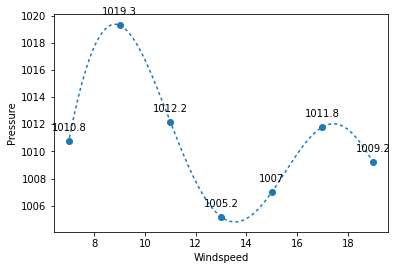

In [ ]:
a=ws
b=p
x = np.arange(min(a), max(a), 0.01)
y = []
for i in x:
    data, waktu = lag(a, b, i)
    y.append(data)
plt.plot(x, y, linestyle=(2, (2, 2)))
for i in range(len(a)):
    plt.annotate(b[i], (a[i], b[i]),
                  textcoords="offset points",
                  xytext=(0, 10),
                  ha='center')
plt.scatter(a, b)
plt.title('Dengan Metode Lagrange')
plt.xlabel('Windspeed')
plt.ylabel('Pressure')
plt.show()

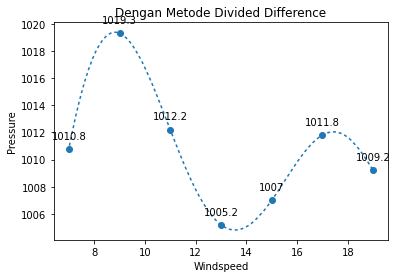

In [ ]:
a=ws
b=p
x = np.arange(min(a), max(a), 0.01)
y = []
for i in x:
    data, waktu = ddiff(a, b, i)
    y.append(data)
plt.plot(x, y, linestyle=(2, (2, 2)))
for i in range(len(a)):
    plt.annotate(b[i], (a[i], b[i]),
                  textcoords="offset points",
                  xytext=(0, 10),
                  ha='center')
plt.scatter(a, b)
plt.title('Dengan Metode Divided Difference')
plt.xlabel('Windspeed')
plt.ylabel('Pressure')
plt.show()

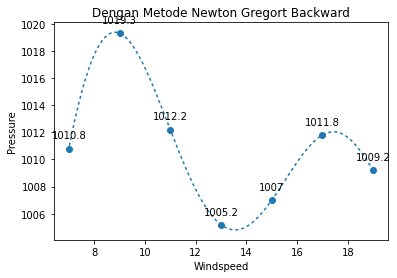

In [ ]:
a=ws
b=p
x = np.arange(min(a), max(a), 0.01)
y = []
for i in x:
    data, waktu = ngb(a, b, i)
    y.append(data)
plt.plot(x, y, linestyle=(2, (2, 2)))
for i in range(len(a)):
    plt.annotate(b[i], (a[i], b[i]),
                  textcoords="offset points",
                  xytext=(0, 10),
                  ha='center')
plt.scatter(a, b)
plt.title('Dengan Metode Newton Gregort Backward')
plt.xlabel('Windspeed')
plt.ylabel('Pressure')
plt.show()

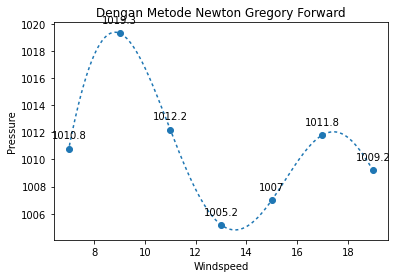

In [ ]:
a=ws
b=p
x = np.arange(min(a), max(a), 0.01)
y = []
for i in x:
    data, waktu = ngf(a, b, i)
    y.append(data)
plt.plot(x, y, linestyle=(2, (2, 2)))
for i in range(len(a)):
    plt.annotate(b[i], (a[i], b[i]),
                  textcoords="offset points",
                  xytext=(0, 10),
                  ha='center')
plt.scatter(a, b)
plt.title('Dengan Metode Newton Gregory Forward')
plt.xlabel('Windspeed')
plt.ylabel('Pressure')
plt.show()